In [1]:
from keras.models import load_model
from keras.models import model_from_json

json_file = open('modeladam.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


loaded_model.load_weights('modeladam.h5')

model = loaded_model


print('Model successfully loaded')

Metal device set to: Apple M1
Model successfully loaded


2021-11-23 01:35:44.016388: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-23 01:35:44.016491: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


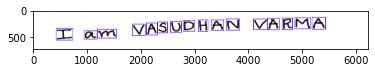

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

characters = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']


#enter input image here
image = cv2.imread('iamvasu.png')
height, width, depth = image.shape

#resizing the image to find spaces better
image = cv2.resize(image, dsize=(width*5,height*4), interpolation=cv2.INTER_CUBIC)
#grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


#binary
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)


#dilation
kernel = np.ones((5,5), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)


#adding GaussianBlur
gsblur=cv2.GaussianBlur(img_dilation,(5,5),0)


#find contours
ctrs, hier = cv2.findContours(gsblur.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

m = list()
#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
pchl = list()
dp = image.copy()
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    cv2.rectangle(dp,(x-10,y-10),( x + w + 10, y + h + 10 ),(90,0,255),9)
    
plt.imshow(dp)

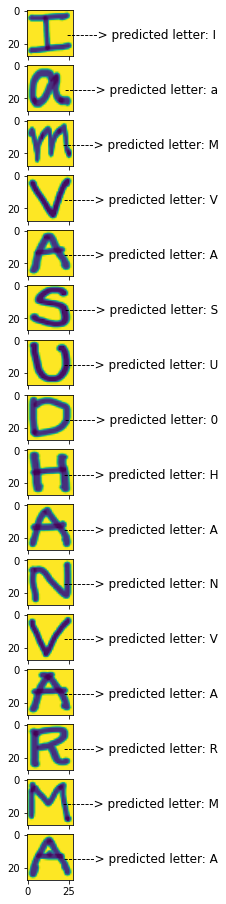

Predicted String: IaMVASU0HANVARMA


In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    # Getting ROI
    roi = image[y-10:y+h+10, x-10:x+w+10]
    roi = cv2.resize(roi, dsize=(28,28), interpolation=cv2.INTER_CUBIC)
    roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    
    roi = np.array(roi)
    t = np.copy(roi)
    t = t / 255.0
    t = 1-t
    t = t.reshape(1,784)
    m.append(roi)
    pred = np.argmax(model.predict(t))
    pchl.append(pred)

    

pcw = list()
interp = 'bilinear'
fig, axs = plt.subplots(nrows=len(sorted_ctrs), sharex=True, figsize=(1,len(sorted_ctrs)))
for i in range(len(pchl)):
#     print (pchl[i])
    pcw.append(characters[int(pchl[i])])
    axs[i].set_title('-------> predicted letter: '+characters[pchl[i]], x=2.5,y=0.24)
    axs[i].imshow(m[i], interpolation=interp)

plt.show()


predstring = ''.join(pcw)
print('Predicted String: '+predstring)

0 668 6 878
155 606 1565 2223
58 538 2308 3325


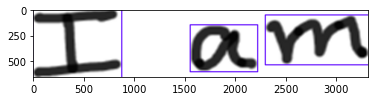

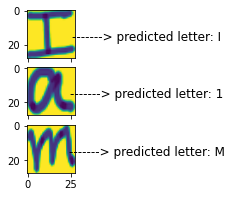

Predicted String: I1M
327 976 0 654
259 943 785 1324
194 813 1416 1892
167 774 2121 2674
96 703 2831 3419
62 713 3680 4157
62 648 4400 5035
0 637 5237 5930


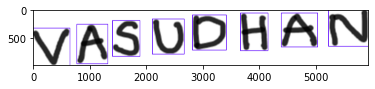

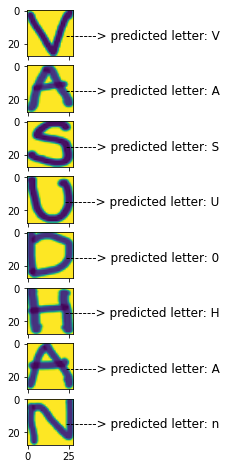

Predicted String: VASU0HAn
103 702 0 726
60 710 782 1363
40 704 1588 2108
28 649 2302 3129
0 677 3261 3940


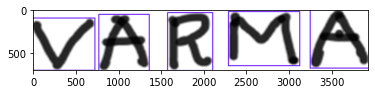

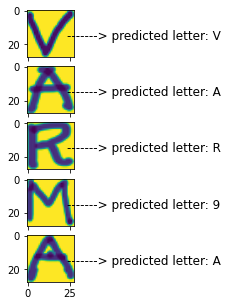

Predicted String: VAR9A


In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

characters = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
num_of_words = 3

for k in range(num_of_words):
    name = str(k)+"aa.png"
    image = cv2.imread(name)
    height, width, depth = image.shape
    image = cv2.resize(image, dsize=(width*15,height*14), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
    kernel = np.ones((5,5), np.uint8)
    img_dilation = cv2.dilate(thresh, kernel, iterations=1)
    gsblur=cv2.GaussianBlur(img_dilation,(5,5),0)
    ctrs, hier = cv2.findContours(gsblur.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    m = list()
    sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    pchl = list()
    dp = image.copy()
    for i, ctr in enumerate(sorted_ctrs):
        x, y, w, h = cv2.boundingRect(ctr)
        cv2.rectangle(dp,(x-10,y-10),( x + w + 10, y + h + 10 ),(90,0,255),9)
    plt.imshow(dp)
    for i, ctr in enumerate(sorted_ctrs):
        x, y, w, h = cv2.boundingRect(ctr)
        print(y,y+h+10,x,x+w+10)
        roi = image[y:y+h+10, x:x+w+10]
        roi = cv2.resize(roi, dsize=(28,28), interpolation=cv2.INTER_CUBIC)
        roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
        roi = np.array(roi)
        t = np.copy(roi)
        t = t / 255.0
        t = 1-t
        t = t.reshape(1,784)
        m.append(roi)
        pred = np.argmax(model.predict(t))
        pchl.append(pred)
    pcw = list()
    interp = 'bilinear'
    fig, axs = plt.subplots(nrows=len(sorted_ctrs), sharex=True, figsize=(1,len(sorted_ctrs)))
    for i in range(len(pchl)):
        pcw.append(characters[int(pchl[i])])
        axs[i].set_title('-------> predicted letter: '+characters[pchl[i]], x=2.5,y=0.24)
        axs[i].imshow(m[i], interpolation=interp)
    plt.show()
    predstring = ''.join(pcw)
    print('Predicted String: '+predstring)